# Data Exploration

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import itertools
import re
import nltk

## Dataset: [The Internet Movie Script Database (IMSDb)](https://imsdb.com/)

In [2]:
df = pd.read_csv('data/imsdb-scripts.csv')

In [3]:
df0 = df.copy()

Data have been obtained by scraping. During that, missing values (movies without script) have been handled.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    1140 non-null   object
 1   genre    1140 non-null   object
 2   writers  1140 non-null   object
 3   url      1140 non-null   object
 4   script   1140 non-null   object
dtypes: object(5)
memory usage: 44.7+ KB


In [5]:
df.head()

,title,genre,writers,url,script
0,10 Things I Hate About You,"['Comedy', 'Romance']","['Karen McCullah Lutz', 'Kirsten Smith', 'Will...",https://imsdb.com/scripts/10-Things-I-Hate-Abo...,\n\r\n\r\n\r\nTen Things I Hate About You - by...
1,12,['Comedy'],['Lawrence Bridges'],https://imsdb.com/scripts/12.html,\n\n\n \r\n 12 - Script\r\n[[None]]\n
2,12 and Holding,['Drama'],['Anthony Cipriano'],https://imsdb.com/scripts/12-and-Holding.html,\n \r\n\n\n\n[[12ANDHOLDING]]\n\n\n ...
3,12 Monkeys,"['Drama', 'Sci-Fi', 'Thriller']","['David Peoples', 'Janet Peoples']",https://imsdb.com/scripts/12-Monkeys.html,\n\r\n\r\n\r\nTwelve Monkeys\r\n\r\n\r\n[[TWEL...
4,12 Years a Slave,['Drama'],['John Ridley'],https://imsdb.com/scripts/12-Years-a-Slave.html,\n\r\n\r\n\r\n[[12YEARSASLAVE]]\n\r\n\r\n\r\n\...


In [6]:
def random_script(df):
    return df.iloc[random.randint(0, len(df))]['script']

In general, script formatting is standardized. Square brackets represent original bold formatting, which for the most identifies movie characters.

In [7]:
print(random_script(df))







[[THESECRETLIFEOFWALTERMITTY]]
                         


                                 Written by
                         
                                Steve Conrad

                         
                         
                         
                         
[[3/16/11]]


           "Too much happens... Man performs, engenders so much more
          than he can or should have to bear. That's how he finds that
          he can bear anything."
                         
          - William Faulkner
                         
[[INT.WALTER'SAPARTMENT,BROOKLYN-MORNING]]
                         
          Walter Mitty (30s) sits at his small kitchen table, balancing
          his check book. We see his last several expense entries:
                         
          Mom's new apt. deposit
                         
[[EHARMONYSIGN-UP]]
                         
          O's braces (2nd installment)
                         
[[PIANOMOVERS]]
                         
[

During scraping, genres have been stored in a list, but now they are a string in a list format. We must process them. Then, we store them in binary variables.

In [8]:
def process_genre_string(genre_string):
    for char in ['[',']','.',',','\'']:
        genre_string = genre_string.replace(char, ' ')
    return genre_string.split()


genres = list()
# getting the list of the genres
for genres_in_movie in df['genre']:
    genres_found = [g for g in process_genre_string(genres_in_movie)]
    genres = list(set(genres + genres_found))
genres.remove('None')
genres

['War',
 'Romance',
 'Mystery',
 'Comedy',
 'Short',
 'Western',
 'Animation',
 'Sport',
 'Thriller',
 'Sci-Fi',
 'Musical',
 'Adventure',
 'Crime',
 'Biography',
 'Family',
 'Horror',
 'History',
 'Film-Noir',
 'Music',
 'Action',
 'Fantasy',
 'Drama']

In [9]:
# storing every genre in a binary variable
for genre in genres:
    df[genre] = [1 if genre in g else 0 for g in df['genre'].values]

In [10]:
df.drop(['writers','url', 'title', 'genre'], 1, inplace=True)
df.head()

/tmp/ipykernel_191720/2992972678.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['writers','url', 'title', 'genre'], 1, inplace=True)


,script,War,Romance,Mystery,Comedy,Short,Western,Animation,Sport,Thriller,...,Crime,Biography,Family,Horror,History,Film-Noir,Music,Action,Fantasy,Drama
0,\n\r\n\r\n\r\nTen Things I Hate About You - by...,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,\n\n\n \r\n 12 - Script\r\n[[None]]\n,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,\n \r\n\n\n\n[[12ANDHOLDING]]\n\n\n ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,\n\r\n\r\n\r\nTwelve Monkeys\r\n\r\n\r\n[[TWEL...,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,\n\r\n\r\n\r\n[[12YEARSASLAVE]]\n\r\n\r\n\r\n\...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Genre can be our ground truth for a binary classification (e.g. drama not-drama) or a multiclass classification.

In [11]:
sorted([(genre, sum(df[genre].values)) for genre in genres],
       key=lambda x: x[1],
       reverse=True)

[('Drama', 621),
 ('Thriller', 381),
 ('Comedy', 371),
 ('Action', 309),
 ('Crime', 217),
 ('Romance', 196),
 ('Adventure', 186),
 ('Sci-Fi', 167),
 ('Horror', 155),
 ('Fantasy', 116),
 ('Mystery', 112),
 ('Animation', 42),
 ('Family', 42),
 ('Music', 30),
 ('War', 28),
 ('Musical', 25),
 ('Western', 15),
 ('Film-Noir', 4),
 ('Short', 3),
 ('Biography', 3),
 ('History', 3),
 ('Sport', 2)]

Genres are not mutually exclusive. There can be some relations between them. We can treat movies like sets according to genre using the Jaccard index.

In [12]:
def jaccard_binary(x,y):
    intersection = np.logical_and(x, y)
    union = np.logical_or(x, y)
    similarity = intersection.sum() / float(union.sum())
    return similarity

genres_similarities = list()
for genre_combination in list(itertools.combinations(genres, 2)):
    genre_similarity = jaccard_binary(df[genre_combination[0]],
                                      df[genre_combination[1]])
    # threshold
    if genre_similarity > 0.05:
        genres_similarities.append((f'{genre_combination[0]} {genre_combination[1]}',
                                    genre_similarity))

sorted(genres_similarities,
       key=lambda x: x[1],
       reverse=True)

[('Musical Music', 0.8333333333333334),
 ('Animation Family', 0.3125),
 ('Adventure Action', 0.30606860158311344),
 ('Thriller Action', 0.2730627306273063),
 ('Sci-Fi Action', 0.2625994694960212),
 ('Thriller Crime', 0.25630252100840334),
 ('Thriller Horror', 0.24074074074074073),
 ('Thriller Drama', 0.23095823095823095),
 ('Romance Comedy', 0.2167381974248927),
 ('Romance Drama', 0.19970631424375918),
 ('Mystery Thriller', 0.19951338199513383),
 ('Crime Drama', 0.1988555078683834),
 ('Sci-Fi Adventure', 0.19661016949152543),
 ('Adventure Fantasy', 0.1796875),
 ('Musical Family', 0.17543859649122806),
 ('Family Music', 0.16129032258064516),
 ('Comedy Drama', 0.1588785046728972),
 ('Crime Action', 0.15859030837004406),
 ('Thriller Sci-Fi', 0.15611814345991562),
 ('Mystery Horror', 0.1459227467811159),
 ('Family Fantasy', 0.1366906474820144),
 ('Action Fantasy', 0.13636363636363635),
 ('Animation Musical', 0.13559322033898305),
 ('Animation Adventure', 0.13432835820895522),
 ('Sci-Fi Hor

## From Text to Time Series

### Defining timestamps

First, we must identify our timestamps. Scripts are divided into lines. We can use square brackets (bold formatting) as a splitting condition. This is much refined and domain-based than sentence splitting.

In [13]:
def script_splitting(script):
    #
    script = re.sub(r'\((\d+|'
                    r'[Cc][Oo][Nn][Tt](\'|[Ii][Nn][Uu][Ed])[Dd]|'
                    r'[Mm][Oo][Rr][Ee])\)',
                    '', script)
    script = ' '.join(script.split())
    #
    script = re.sub(r'\[.+?\] ', '[SEP]', script)
    script = re.sub(r'(\[SEP\])+', '[SEP]', script)
    split_script = [line for line in re.split(r' ?\[SEP\]', script) if line]
    if not split_script:
        return ['']
    # cleaning
    # TODO: set more refined rules or cut the fist n lines
    if split_script[0].startswith('Written by'):
        split_script.pop(0)
    return split_script

In [14]:
script_splitting(random_script(df))

['"Alien", early draft, by Dan O\'Bannon ALIEN (project formerly titled STARBEAST) Story by Dan O\'Bannon & Ronald Shusett Screenplay by Dan O\'Bannon',
 "En route back to Earth from a far part of the galaxy, the crew of the starship SNARK intercepts a transmission in an alien language, originating from a nearby storm-shrouded planet. Mankind has waited centuries to contact another form of intelligent life in the universe -- they decide to land and investigate. Their search takes them to a wrecked alien spacecraft whose doors gape open -- it is dead and abandoned. Inside they find, among other strange things, the skeleton of one of the unearthly space travellers. Certain clues in the wrecked ship lead them across the hostile surface of the planet to a primitive stone pyramid, the only remnant of a vanished civilization. Beneath this pyramid they find an ancient tomb full of fantastic artifacts. Lying dormant in the tomb are centuries- old spores, which are triggered into life by the me

Once we have our lines, we can convert them into an actual timestamp extracting some numeric features like, for example:
- distributional features;
- sentiment/emotion analysis;
- word/sentence embedding.

The result would be a uni-variate or multivariate time series.

### Example: Sentiment Time Series with VADER

In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/mattiap/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Source code: [https://www.nltk.org/_modules/nltk/sentiment/vader.html](https://www.nltk.org/_modules/nltk/sentiment/vader.html)

VADER (Valence Aware Dictionary for Sentiment Reasoning) is a lexical-based model used for text sentiment analysis. It is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. VADER is plug and play: it can be applied directly to unlabeled text data without tokenization. VADER is also sensitive to negation, capitalization and punctuation. Given a sentence, VADER returns a dictionary of scores in each of four categories: negative, neutral, positive and compound (normalized score for the three before). We can use the compound score to map sentiment in a uni-variate time series.

In [16]:
def generate_vader_ts(script):
    sid = SentimentIntensityAnalyzer()
    ts = [(sid.polarity_scores(line)['compound'],
           line)
          for line in script]
    return ts

In [17]:
generate_vader_ts(
    script_splitting(
        random_script(df)))

[(-0.2263,
  "A man is riding a dressage horse. We can't see his face. Only his boots, spurs, whip, the taut reins, the horse's foamy mouth, the movements that steer the animal. We watch him for a while and hear the SNORTS of the horse, the dull SOUND of THE HOOVES on the ground, the fast-uttered COMMANDS of the rider. Then we start to hear a gentle voice: NARRATOR (o.s.):I don't know if the story that I want to tell you, reflects the truth in every detail. Much of it I only know by hearsay, and a lot of it remains obscure to me even today, and I must leave it in darkness. Many of these questions remain without answer. But I believe I must tell of the strange events that occurred in our village, because they may cast a new light on some of the goings-on in this country..."),
 (0.0516,
  "The rider is the village doctor, a gaunt, intellectual- looking man of around 60, who has finished his dressage session, and now rides toward the open gate beside the CAMERA, goes through it and into t

Using VADER, sentiment time series of a movie script would appear like this (some transformation would be needed):

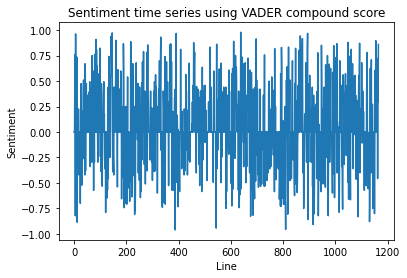

In [18]:
fig, ax = plt.subplots()
ax.plot([line[0] for line in  generate_vader_ts(
    script_splitting(
        random_script(df)))])
ax.set_xlabel('Line')
ax.set_ylabel('Sentiment')
ax.set_title('Sentiment time series using VADER compound score')
plt.show()

### Data preparation for time series

We can build a dataset as sequences of lines. Then, we can convert them into actual time series according to the model used. First, we must allineate or split those sequences to make the future have the same length.

In [19]:
n_lines = [len(script_splitting(script)) for script in df['script']]
sm_lines = np.sum(n_lines)
mn_lines = np.mean(n_lines)
std_lines = np.std(n_lines)
max_lines = max(n_lines)
min_lines = min(n_lines)

In [20]:
print(f'Total number of line: {sm_lines}')
print(f'Average number of lines: {mn_lines}')
print(f'Standard deviation: {std_lines}')
print(f'MAX: {max_lines}')
print(f'MIN: {min_lines}')

Total number of line: 1098611
Average number of lines: 963.6938596491228
Standard deviation: 378.8496880065324
MAX: 2853
MIN: 1


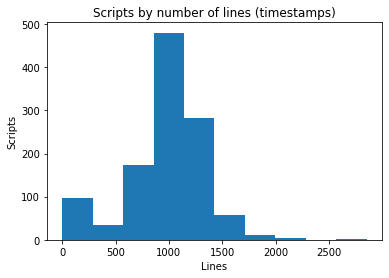

In [21]:
fig, ax = plt.subplots()
ax.hist(n_lines)
ax.set_xlabel('Lines')
ax.set_ylabel('Scripts')
ax.set_title('Scripts by number of lines (timestamps)')
plt.show()